# Project1
By: Thomas Girmay


Hello! To begin, we must first scrape the frist table from https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares and convert it into a pandas dataframe.

In [1766]:
import requests, datetime, lxml
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
solarDf = pd.read_html('https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares')[0]
solarDf.head()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Region,Start,Maximum,End,Unnamed: 7
0,1,X28.0,2003/11/04,486,19:29,19:53,20:06,MovieView archive
1,2,X20.0,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
2,3,X17.2,2003/10/28,486,09:51,11:10,11:24,MovieView archive
3,4,X17.0,2005/09/07,808,17:17,17:40,18:03,MovieView archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive


This table could use some column names so lets add some. Also, since we will not be using the movies, we can drop the column.


In [1767]:
solarDf.columns = ["Rank", "x_class", "date", "region", "start_time", "max_time", "end_time", "movie"]
del solarDf['movie']
solarDf.head()

,Rank,x_class,date,region,start_time,max_time,end_time
0,1,X28.0,2003/11/04,486,19:29,19:53,20:06
1,2,X20.0,2001/04/02,9393,21:32,21:51,22:03
2,3,X17.2,2003/10/28,486,09:51,11:10,11:24
3,4,X17.0,2005/09/07,808,17:17,17:40,18:03
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55


Next, lets consolidate the date and time columns into three columns where each time has the date attached and is a datetime object

In [1768]:
solarDf["start_time"]=pd.to_datetime(solarDf["date"] + ' ' +  solarDf["start_time"])
solarDf["max_time"]=pd.to_datetime(solarDf["date"] + ' ' +  solarDf["max_time"])
solarDf["end_time"]=pd.to_datetime(solarDf["date"] + ' ' +  solarDf["end_time"])
del solarDf["date"]
solarDf.head()

,Rank,x_class,region,start_time,max_time,end_time
0,1,X28.0,486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X20.0,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X17.2,486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X17.0,808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X14.4,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00


Let's check the datatype of the time columns.

In [1769]:
type(solarDf["start_time"][0])
type(solarDf["max_time"][0])
type(solarDf["end_time"][0])

pandas._libs.tslibs.timestamps.Timestamp

Timestamps are the pandas equivalent to the python datetime library. 
Now we can continue to format this table. Lets rename these columns since we have the date entered as well as the time and we can rearrange the columns a bit.

In [1770]:
solarDf.columns = ["Rank", "x_class", "region", "start_datetime", "max_datetime", "end_datetime"]
solarDf =solarDf[["Rank", "x_class", "start_datetime", "max_datetime", "end_datetime", "region"]]
solarDf

,Rank,x_class,start_datetime,max_datetime,end_datetime,region
0,1,X28.0,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
1,2,X20.0,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
3,4,X17.0,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
5,6,X10.0,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486
6,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
7,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
8,9,X9.0,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930
9,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486


In [1771]:
solarDf.dtypes

Rank                       int64
x_class                   object
start_datetime    datetime64[ns]
max_datetime      datetime64[ns]
end_datetime      datetime64[ns]
region                     int64
dtype: object

Now our table is ready to be used for analysis!

# NASA Data

Now, we will need to grab NASA's table on solar flares and make it useable. First, let's scrape the table, drop the columns we don't need, then rename the remaining colums appropriatley https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html

In [1772]:

response = requests.get('https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html')
soup = BeautifulSoup(response.content, 'html.parser').getText().split("\n")
soup = soup[15:-4]
rowsList = []
for element in soup:
    rowsList.append(element.split())
rowsList
nasaDf = pd.DataFrame(rowsList)
for i in range (14,24):
    del nasaDf[i]
nasaDf.columns = ["start_date", "start_time", "end_date",
                  "end_time", "start_frequency", "end_frequency", 
                  "flare_location", "flare_region","importance",
                 "cme_date", "cme_time", "cpa",
                  "width", "speed" ]

nasaDf.head()

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,importance,cme_date,cme_time,cpa,width,speed
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712


If we were to look at the whole dataframe, we can see that observations with no values have different ways of being input across the frame. To make this table less painful to use, we will replace them all with the numpy.nan or enforce the preexisting convention.


In [1773]:
nasaDf.replace('---', np.nan, inplace=True)
nasaDf.replace('----', np.nan, inplace=True)
nasaDf.replace('-----', np.nan, inplace=True)
nasaDf.replace('------', np.nan, inplace=True)
nasaDf.replace('--/--', np.nan, inplace=True)
nasaDf.replace('--:--', np.nan, inplace=True)
nasaDf.replace('????', np.nan, inplace=True)
nasaDf.replace('???', np.nan, inplace=True)

nasaDf.replace('DSF', 'FILA', inplace=True)
nasaDf.replace('DSF', 'FILA', inplace=True)
nasaDf.replace('BACK', "Back", inplace=True)
nasaDf.replace('Back?', "Back", inplace=True)

Now that our missing values are uniform, we can move on to the next step in tidying our table. The CPA column includes the angle of the flares except halo flares which are just denoted by Halo. We should put that information in a separate column and fill in NaNs for the angles of the Halo flares.

In [1774]:
isFlare = []

for flare in nasaDf["cpa"]:
    if flare == 'Halo':
        isFlare.append(False)
    else:
        isFlare.append(True)
nasaDf["is_halo"] = isFlare
nasaDf.replace('Halo', np.nan, inplace=True)

nasaDf.head()

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,importance,cme_date,cme_time,cpa,width,speed,is_halo
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,True
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,NaN,360,878,False
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,NaN,360,464,False
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,True
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,True


Similarly, the width column contains the width and whether or not it is a lower bound. Just as with the cpa column, we need to split this data into two columns.


In [1775]:
isLowerBound = []

for value in nasaDf["width"]:
    if str(value)[0] == '>' and pd.isnull(value) == False:
        value = value[1:]
        isLowerBound.append(True)
    else:
        isLowerBound.append(False)
nasaDf["is_lower_bound"] = isLowerBound  
nasaDf.head()

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,importance,cme_date,cme_time,cpa,width,speed,is_halo,is_lower_bound
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,True,False
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,NaN,360,878,False,False
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,NaN,360,464,False,False
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,True,False
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,True,False


Lastly, we need to convert the dates and times into datetime objects and combine the columns like with the first dataset.

In [1776]:
nasaDf.replace('24:00', '23:59', inplace=True)

years = []
for date in nasaDf["start_date"]:
    years.append(date[0:4])
nasaDf["year"] = pd.DataFrame(years)

nasaDf["start_datetime"]=pd.to_datetime(nasaDf["start_date"] + ' ' +  nasaDf["start_time"])
nasaDf["end_datetime"]=pd.to_datetime(nasaDf["year"] + ' ' + nasaDf["end_date"] + ' ' +  nasaDf["end_time"])
nasaDf["cme_datetime"]=pd.to_datetime(nasaDf["year"] + ' ' + nasaDf["cme_date"] + ' ' +  nasaDf["cme_time"])
del nasaDf["year"], nasaDf["end_date"], nasaDf["cme_date"], nasaDf["end_time"],nasaDf["cme_time"],nasaDf["start_date"], nasaDf["start_time"]
nasaDf = nasaDf[["start_datetime", "end_datetime", "start_frequency","end_frequency",  "flare_location", 
                  "flare_region","importance", 
                  "cme_datetime", "cpa","width", 
                  "speed", "is_halo", "is_lower_bound"
                   ]]

nasaDf

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,importance,cme_datetime,cpa,width,speed,is_halo,is_lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,True,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360,878,False,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360,464,False,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,True,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,True,False
5,1997-11-03 05:15:00,1997-11-03 12:00:00,14000,250,S20W13,8100,C8.6,1997-11-03 05:28:00,240,109,227,True,False
6,1997-11-03 10:30:00,1997-11-03 11:30:00,14000,5000,S16W21,8100,M4.2,1997-11-03 11:11:00,233,122,352,True,False
7,1997-11-04 06:00:00,1997-11-05 04:30:00,14000,100,S14W33,8100,X2.1,1997-11-04 06:10:00,NaN,360,785,False,False
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,False,False
9,1997-11-27 13:30:00,1997-11-27 14:00:00,14000,7000,N17E63,8113,X2.6,1997-11-27 13:56:00,98,91,441,True,False


In [1777]:

nasaDf.dtypes

start_datetime     datetime64[ns]
end_datetime       datetime64[ns]
start_frequency            object
end_frequency              object
flare_location             object
flare_region               object
importance                 object
cme_datetime       datetime64[ns]
cpa                        object
width                      object
speed                      object
is_halo                      bool
is_lower_bound               bool
dtype: object

# Analysis

Now that our tables are cleaned up, we can begin some analysis! First, lets compare our two datasets by editing the NASA dataset a bit. We can index by the importance column and take the first 50 observations to create another top 50 list. 

In [1778]:
top50Df = nasaDf.set_index("importance")
top50Df.sort_values("importance", ascending=False,inplace=True)
top50Df = top50Df.head(50)
top50Df.head(10)

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,cme_datetime,cpa,width,speed,is_halo,is_lower_bound
importance,,,,,,,,,,,,
X9.4,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,1997-11-06 12:10:00,NaN,360,1556,False,False
X9.0,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,NaT,NaN,NaN,NaN,True,False
X8.3,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,2003-11-02 17:30:00,NaN,360,2598,False,False
X7.1,2005-01-20 07:15:00,2005-01-20 16:30:00,14000,25,N14W61,10720,2005-01-20 06:54:00,NaN,360,882,False,False
X6.9,2011-08-09 08:20:00,2011-08-09 08:35:00,16000,4000,N17W69,11263,2011-08-09 08:12:00,NaN,360,1610,False,False
X6.5,2006-12-06 19:00:00,2006-12-08 23:59:00,16000,30,S05E64,10930,NaT,NaN,NaN,NaN,True,False
X6.2,2005-09-09 19:45:00,2005-09-09 22:00:00,10000,50,S12E67,10808,2005-09-09 19:48:00,NaN,360,2257,False,False
X5.7,2000-07-14 10:30:00,2000-07-15 14:30:00,14000,80,N22W07,9077,2000-07-14 10:54:00,NaN,360,1674,False,False
X5.6,2001-04-06 19:35:00,2001-04-07 01:50:00,14000,230,S21E31,9415,2001-04-06 19:30:00,NaN,360,1270,False,False


When comparing the two tables, we can see that they do not show the same top fifty! The NASA table is missing some values that appear in the SpaceWeatherLive table. Let us write a function that can compare values in our NASA table and find the matching entry in the SpaceWeatherLive table. We can compare the rank and the year to see if they match and drop the ones that have none.

In [1779]:
rankList = [] 

for index1, top50 in top50Df.iterrows():
    i =0
    for index2, solar in solarDf.iterrows():
        i+= 1
        if index1 == solar["x_class"] and top50["start_datetime"].year == solar["start_datetime"].year:
            rankList.append(solar["Rank"])
            break
        elif i > 49:
            rankList.append(np.nan)
top50Df["solar_rank"]= rankList
top50Df = top50Df[pd.isnull(top50Df["solar_rank"])== False]
top50Df

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,cme_datetime,cpa,width,speed,is_halo,is_lower_bound,solar_rank
importance,,,,,,,,,,,,,
X9.4,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,1997-11-06 12:10:00,NaN,360,1556,False,False,7.0
X9.0,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,NaT,NaN,NaN,NaN,True,False,9.0
X8.3,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,2003-11-02 17:30:00,NaN,360,2598,False,False,10.0
X7.1,2005-01-20 07:15:00,2005-01-20 16:30:00,14000,25,N14W61,10720,2005-01-20 06:54:00,NaN,360,882,False,False,12.0
X6.9,2011-08-09 08:20:00,2011-08-09 08:35:00,16000,4000,N17W69,11263,2011-08-09 08:12:00,NaN,360,1610,False,False,13.0
X6.5,2006-12-06 19:00:00,2006-12-08 23:59:00,16000,30,S05E64,10930,NaT,NaN,NaN,NaN,True,False,14.0
X6.2,2005-09-09 19:45:00,2005-09-09 22:00:00,10000,50,S12E67,10808,2005-09-09 19:48:00,NaN,360,2257,False,False,15.0
X5.7,2000-07-14 10:30:00,2000-07-15 14:30:00,14000,80,N22W07,9077,2000-07-14 10:54:00,NaN,360,1674,False,False,17.0
X5.6,2001-04-06 19:35:00,2001-04-07 01:50:00,14000,230,S21E31,9415,2001-04-06 19:30:00,NaN,360,1270,False,False,18.0


# Visualizations
Now that our dataframes are all set, we can begin making some graphs and charts. First let's observe the trend of the speeds over time. We can make another frame that is indexed by year and plot all of the speeds for the top 50 solar flares in the original frame

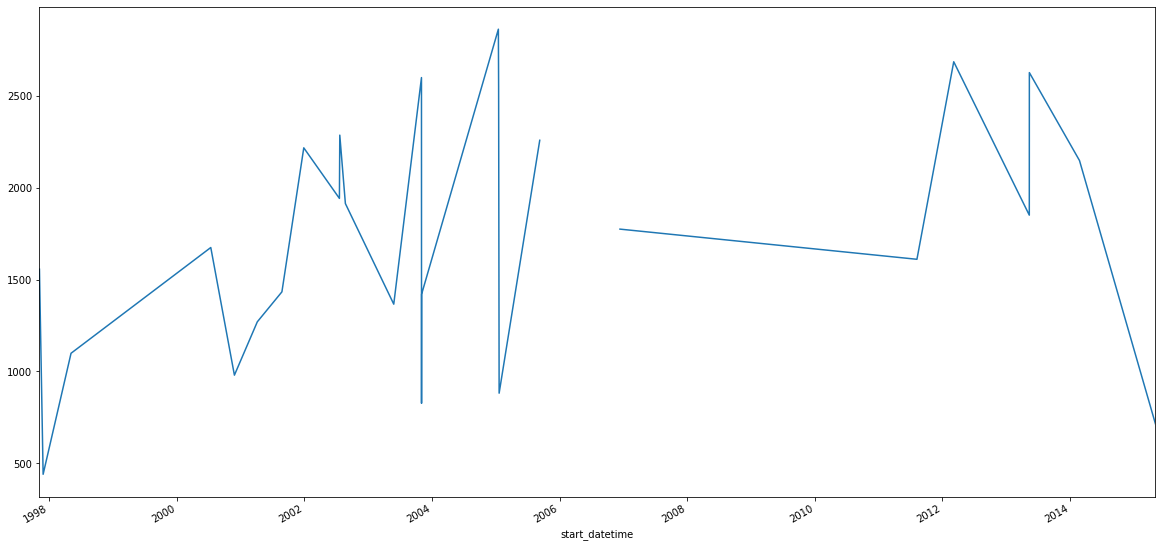

In [1780]:
top50Df["speed"] = pd.to_numeric(top50Df["speed"], errors = 'coerce')
top50ByDate = top50Df.set_index("start_datetime")
top50ByDate["speed"].plot.line(figsize=(20,10))

Next, lets see how many of these solar flares were halos using a pie chart

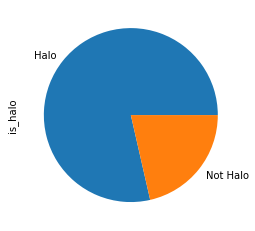

In [1781]:

top50ByDate.is_halo.value_counts().plot.pie(labels = ["Halo", "Not Halo"])



We can see that only about a quarter of the flares were halos! 

Next, lets check to see the number of flares per month

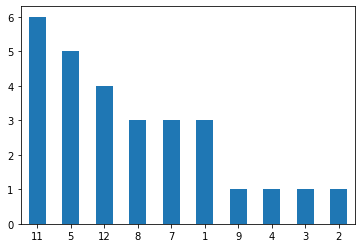

In [1782]:
monthsList = []
for index, row in top50Df.iterrows():
    monthsList.append(row["start_datetime"].month)
top50ByDate["month"] = monthsList

top50ByDate.month.value_counts().plot.bar(x= "month", rot=0)